In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
# import our data
df = pd.read_csv("data/vegetable_train.csv", dtype='category')
print(df)

    Vegetable  Season Month Temp Disaster Vegetable condition Price per kg
0      potato  winter   jan   15       no               fresh           20
1     tomato   winter   jan   15       no               fresh           50
2        peas  winter   jan   15       no               fresh           70
3     pumpkin  winter   jan   15       no               fresh           25
4    cucumber  winter   jan   15       no               fresh           20
..        ...     ...   ...  ...      ...                 ...          ...
116   brinjal  winter   jan   15      yes               fresh           33
117    ginger  winter   jan   15       no               fresh           88
118    potato  summer   apr   32       no               fresh           24
119      peas  summer   apr   33       no               fresh           33
120    radish  summer   apr   32       no               fresh            9

[121 rows x 7 columns]


In [3]:
df2 = pd.DataFrame([df.iloc[:, i].cat.codes for i in range(df.shape[1])]).T
print(df2)

      0  1  2   3  4  5   6
0    12  4  4   0  0  1  14
1    15  4  4   0  0  1  33
2    10  4  4   0  0  1  37
3    13  4  4   0  0  1  21
4     5  4  4   0  0  1  14
..   .. .. ..  .. .. ..  ..
116   1  4  4   0  1  1  28
117   7  4  4   0  0  1  40
118  12  3  1   9  0  1  20
119  10  3  1  10  0  1  28
120  14  3  1   9  0  1  41

[121 rows x 7 columns]


In [4]:
# set up X and y and split training/testing data
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# set up and fit tree to training data
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

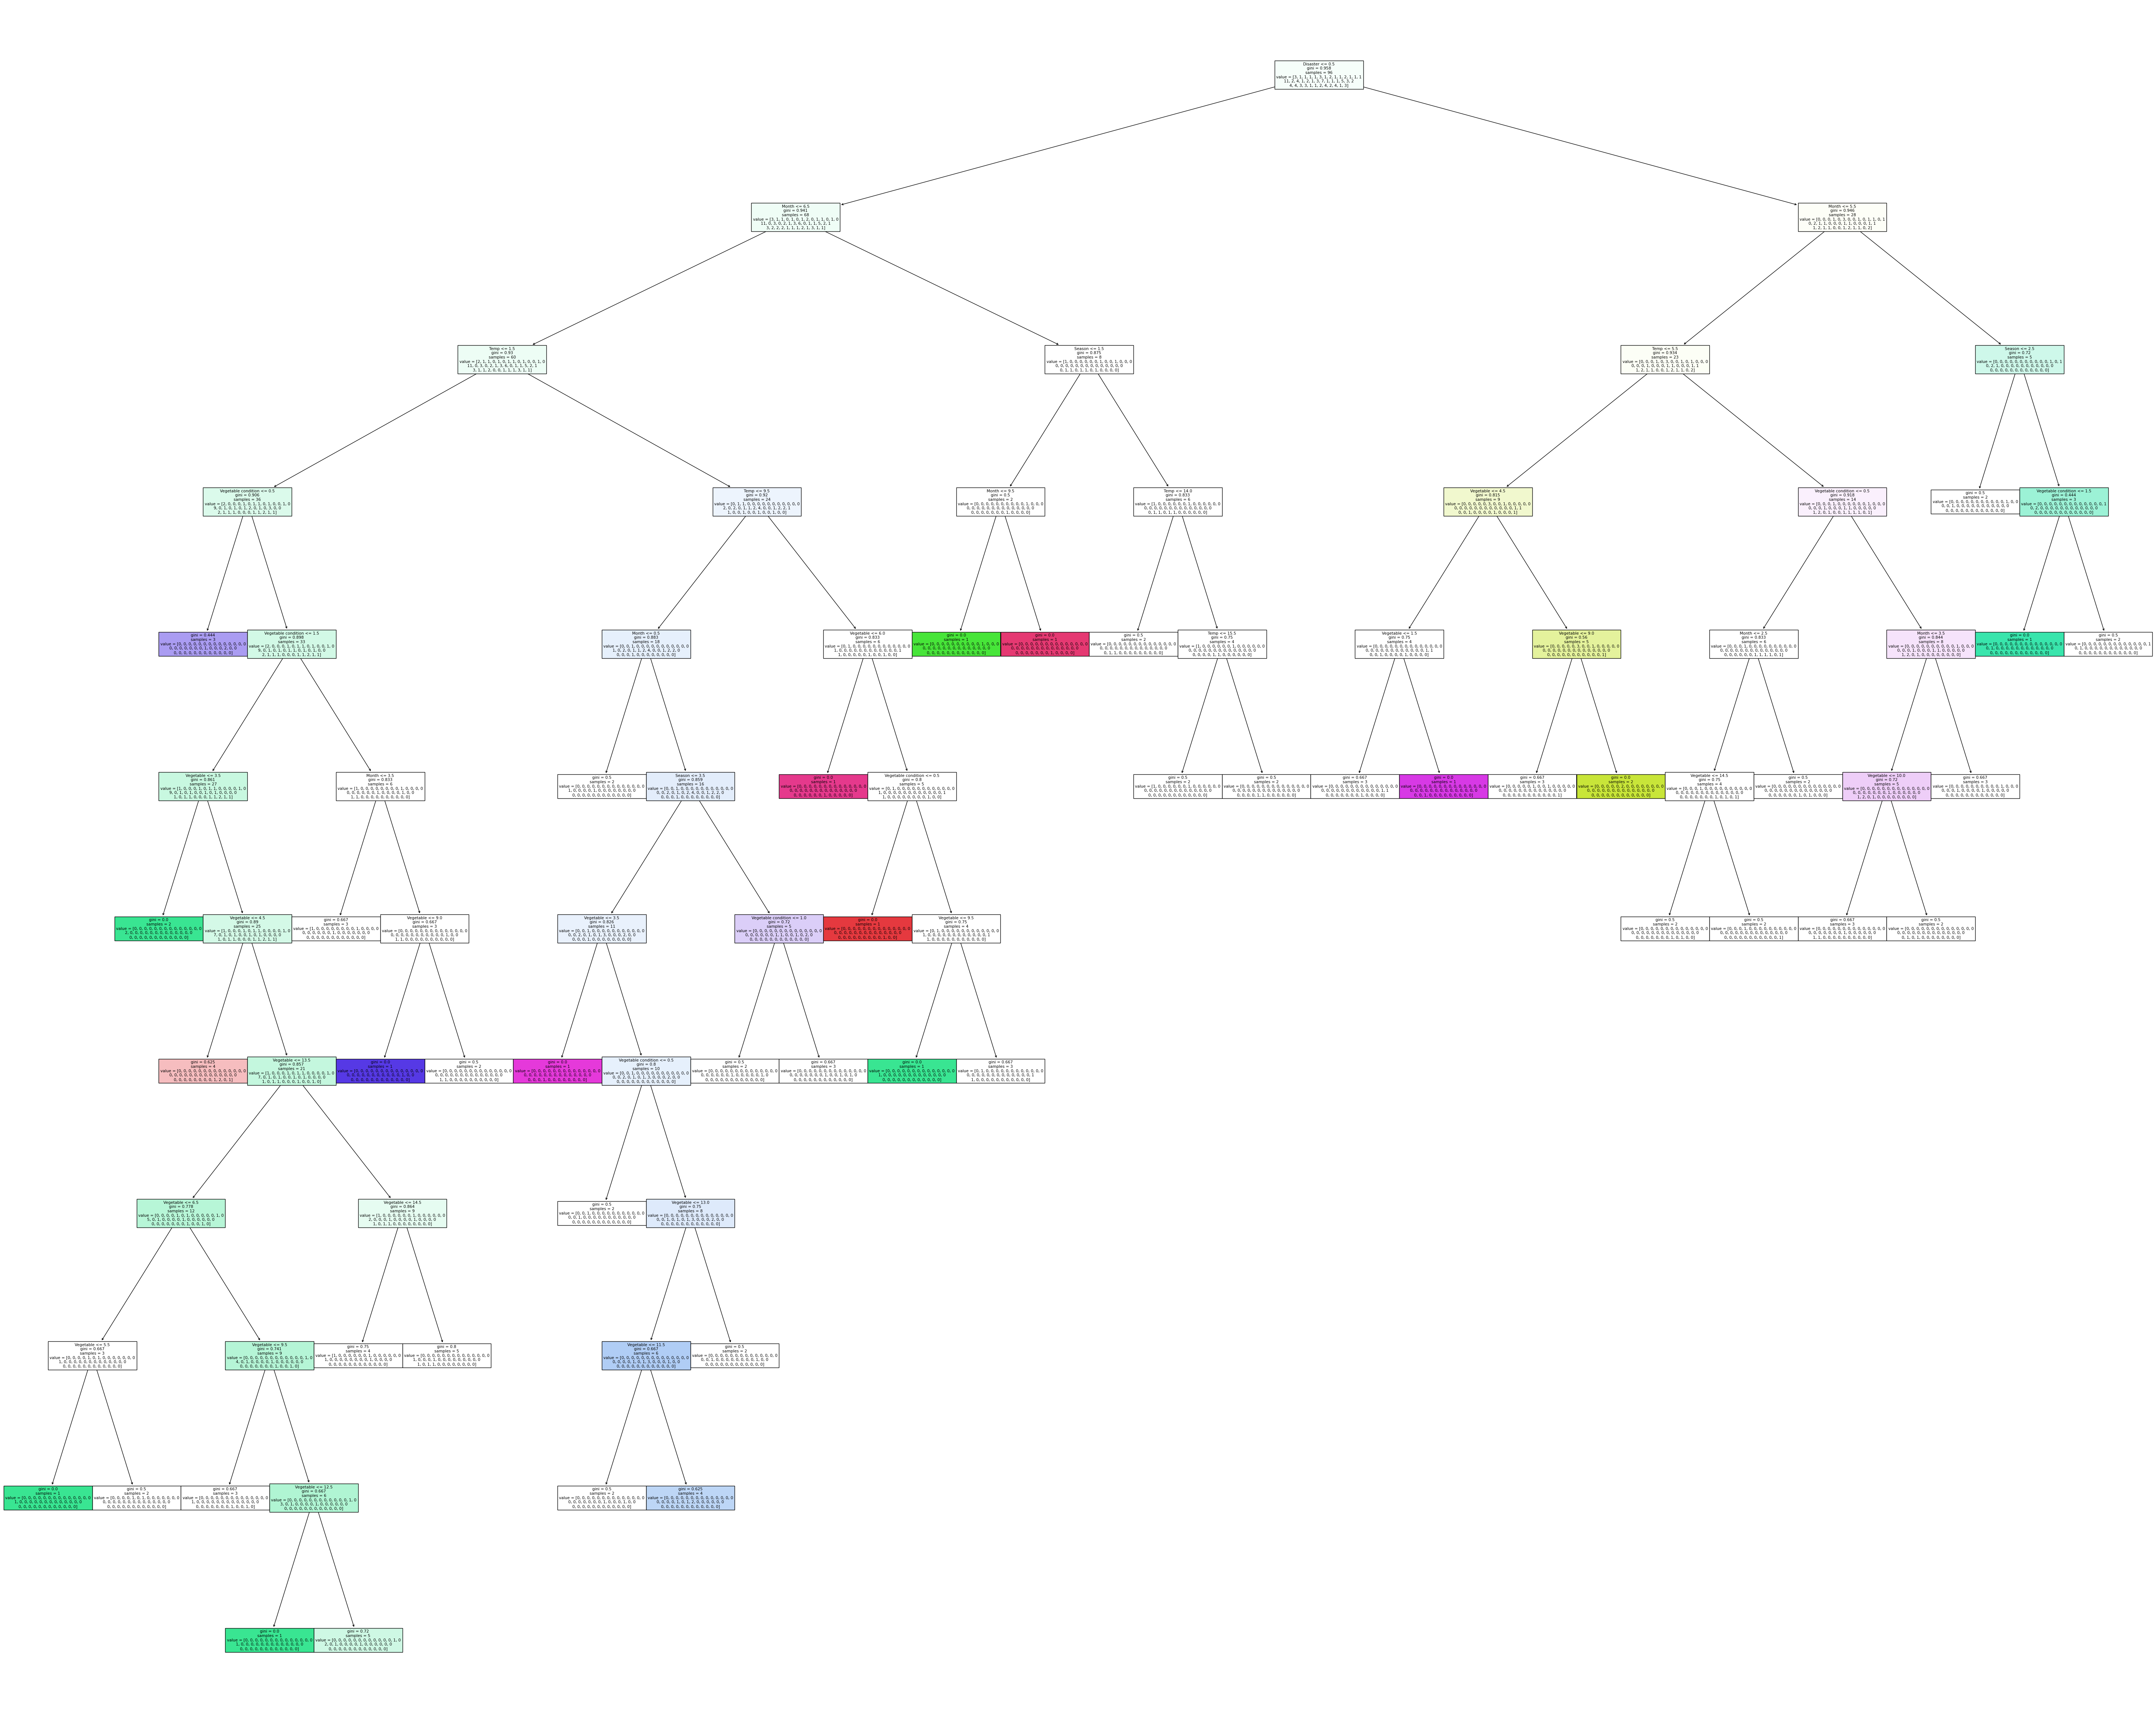

In [6]:
# plot the tree
fig = plt.figure(figsize=(75,60))
_ = tree.plot_tree(dtree, feature_names = 
                   ['Vegetable', 'Season', 'Month', 'Temp', 'Disaster', 'Vegetable condition', 'Price per kg'], filled=True)

In [7]:
# make predictions
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

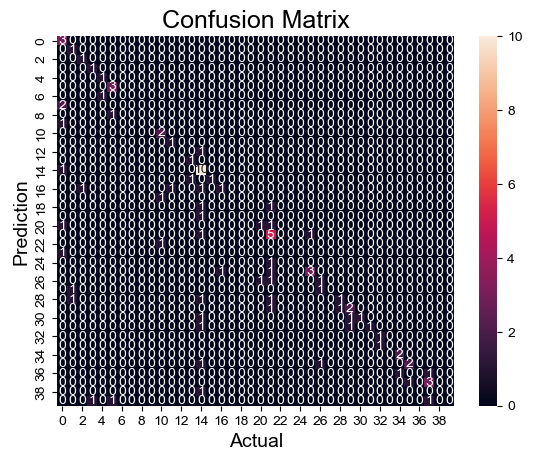

Accuracy   : 0.5104166666666666


In [8]:
# show confusion matrix for training data

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_train,y_train_pred)

sns.heatmap(cm, annot=True, fmt='g')
sns.set(rc={'figure.figsize':(15, 15)})
plt.ylabel('Prediction',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy   :", accuracy)

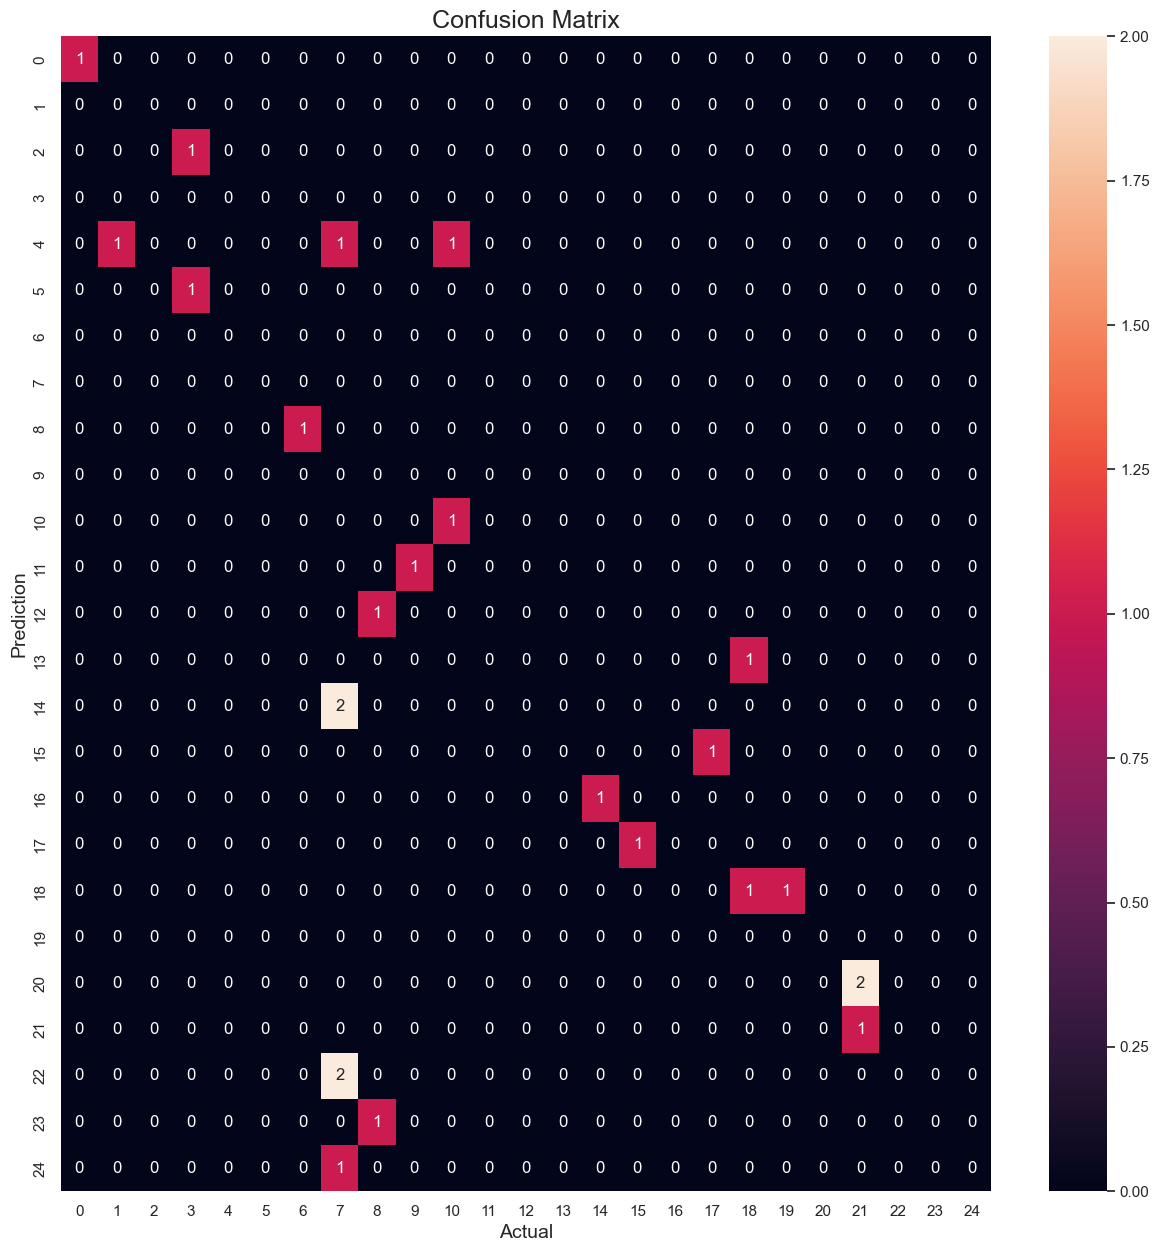

Accuracy   : 0.16


In [9]:
# show confusion matrix for testing data

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test,y_test_pred)

sns.heatmap(cm, annot=True, fmt='g')
sns.set(rc={'figure.figsize':(15, 15)})
plt.ylabel('Prediction',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy   :", accuracy)